# Chapter 4: MNIST Database

In [1]:
! [ -e /content ] 
! pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


Setting Up fast.ai libraries and setting default color maps of images to be only greyscale


In [2]:
from fastai.vision.all import *
from fastbook import *

# Setting a default color map of images ()
matplotlib.rc('image', cmap='Greys')

Getting a dataset path from MNIST

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [7]:
# (path/'train').ls()
# path.ls()

# inside our path are 2 folders called 3 and 7. What are in them?
threes = (path/'train'/'3').ls().sorted() #
sevens = (path/'train'/'7').ls().sorted()

threes

(#6131) [Path('/home/justinhompho/.fastai/data/mnist_sample/train/3/10.png'),Path('/home/justinhompho/.fastai/data/mnist_sample/train/3/10000.png'),Path('/home/justinhompho/.fastai/data/mnist_sample/train/3/10011.png'),Path('/home/justinhompho/.fastai/data/mnist_sample/train/3/10031.png'),Path('/home/justinhompho/.fastai/data/mnist_sample/train/3/10034.png'),Path('/home/justinhompho/.fastai/data/mnist_sample/train/3/10042.png'),Path('/home/justinhompho/.fastai/data/mnist_sample/train/3/10052.png'),Path('/home/justinhompho/.fastai/data/mnist_sample/train/3/1007.png'),Path('/home/justinhompho/.fastai/data/mnist_sample/train/3/10074.png'),Path('/home/justinhompho/.fastai/data/mnist_sample/train/3/10091.png')...]

In [15]:
img3_path = threes[6]
img3 = Image.open(img3_path)
img3


### Exercise to diaply multiple images

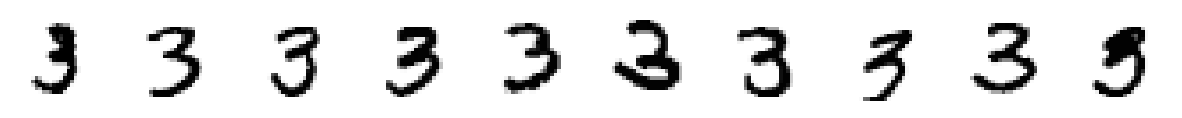

In [30]:
fig, axes = plt.subplots(1, 10, figsize=(15, 2))  # Adjust figsize as needed

for i in range(10):
  img = Image.open(threes[i])
  
  axes[i].imshow(img)
  axes[i].axis('off')  # Turn off axis for a cleaner look

plt.show()


We can turn the images into a 2D array of light values per pixel

In [32]:
array(img3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  61],
       [  0,  71, 234, 234, 234, 244],
       [  0, 191, 253, 253, 253, 214],
       [  0, 109, 181,  61,  61,  30],
       [  0,  25,  20,   0,   0,   0]], dtype=uint8)

We can visualize then array by color coding with Pandas

In [34]:
img3_tensor = tensor(img3) #tensor basically means to tranlate into array (of varying dimentions)
img3_dataframe = pd.DataFrame(img3_tensor[4:15,4:22])
img3_dataframe.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,61,177,254,255,153,118,118,118,6,0,0,0,0
2,0,71,234,234,234,244,253,253,253,253,253,253,253,179,66,0,0,0
3,0,191,253,253,253,214,177,177,239,253,253,253,253,253,170,0,0,0
4,0,109,181,61,61,30,0,0,50,61,150,229,253,253,233,41,0,0
5,0,25,20,0,0,0,0,0,0,0,0,144,253,253,253,54,0,0
6,0,0,0,0,0,0,0,0,0,0,9,150,253,253,204,22,0,0
7,0,0,0,0,0,0,0,0,0,97,210,253,253,253,170,0,0,0
8,0,0,0,0,0,0,108,233,248,252,253,253,253,208,22,0,0,0
9,0,0,0,0,5,160,253,253,253,253,253,253,253,186,12,0,0,0


### Stop and Think p. 140

How would you compare an image with a particular digit average?

1. I would greysccale my image, possibly increase contrast
2. Go pixel by pixel to see if there is a match, maybe have some sort of tolerance
3 If most pixels match up enough (maybe 90% of pixels are marked "matched" according tolerance) 